In [89]:
import pandas as pnd
import numpy as num
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [90]:
Topic=pnd.read_csv("spam_base.names" , skiprows= 32 ,sep="\s+", engine="python", names=["attr",""])
Topic=Topic["attr"]
Topic=list(Topic)
Topic.append("spam_data")
Topic

['word_freq_make:',
 'word_freq_address:',
 'word_freq_all:',
 'word_freq_3d:',
 'word_freq_our:',
 'word_freq_over:',
 'word_freq_remove:',
 'word_freq_internet:',
 'word_freq_order:',
 'word_freq_mail:',
 'word_freq_receive:',
 'word_freq_will:',
 'word_freq_people:',
 'word_freq_report:',
 'word_freq_addresses:',
 'word_freq_free:',
 'word_freq_business:',
 'word_freq_email:',
 'word_freq_you:',
 'word_freq_credit:',
 'word_freq_your:',
 'word_freq_font:',
 'word_freq_000:',
 'word_freq_money:',
 'word_freq_hp:',
 'word_freq_hpl:',
 'word_freq_george:',
 'word_freq_650:',
 'word_freq_lab:',
 'word_freq_labs:',
 'word_freq_telnet:',
 'word_freq_857:',
 'word_freq_data:',
 'word_freq_415:',
 'word_freq_85:',
 'word_freq_technology:',
 'word_freq_1999:',
 'word_freq_parts:',
 'word_freq_pm:',
 'word_freq_direct:',
 'word_freq_cs:',
 'word_freq_meeting:',
 'word_freq_original:',
 'word_freq_project:',
 'word_freq_re:',
 'word_freq_edu:',
 'word_freq_table:',
 'word_freq_conference:',
 '

In [91]:
Data = pnd.read_csv("spam_base.data" , names=Topic , header=None)

In [92]:
print(Data.head)

<bound method NDFrame.head of       word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0                0.00                0.64            0.64            0.0   
1                0.21                0.28            0.50            0.0   
2                0.06                0.00            0.71            0.0   
3                0.00                0.00            0.00            0.0   
4                0.00                0.00            0.00            0.0   
...               ...                 ...             ...            ...   
4596             0.31                0.00            0.62            0.0   
4597             0.00                0.00            0.00            0.0   
4598             0.30                0.00            0.30            0.0   
4599             0.96                0.00            0.00            0.0   
4600             0.00                0.00            0.65            0.0   

      word_freq_our:  word_freq_over:  word_freq_remove: 

In [93]:
Data.describe

<bound method NDFrame.describe of       word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0                0.00                0.64            0.64            0.0   
1                0.21                0.28            0.50            0.0   
2                0.06                0.00            0.71            0.0   
3                0.00                0.00            0.00            0.0   
4                0.00                0.00            0.00            0.0   
...               ...                 ...             ...            ...   
4596             0.31                0.00            0.62            0.0   
4597             0.00                0.00            0.00            0.0   
4598             0.30                0.00            0.30            0.0   
4599             0.96                0.00            0.00            0.0   
4600             0.00                0.00            0.65            0.0   

      word_freq_our:  word_freq_over:  word_freq_remo

In [54]:
print((Data.duplicated().value_counts()))

False    4210
True      391
dtype: int64


In [94]:
Data = Data.drop_duplicates()
Data.head

<bound method NDFrame.head of       word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0                0.00                0.64            0.64            0.0   
1                0.21                0.28            0.50            0.0   
2                0.06                0.00            0.71            0.0   
3                0.00                0.00            0.00            0.0   
4                0.00                0.00            0.00            0.0   
...               ...                 ...             ...            ...   
4596             0.31                0.00            0.62            0.0   
4597             0.00                0.00            0.00            0.0   
4598             0.30                0.00            0.30            0.0   
4599             0.96                0.00            0.00            0.0   
4600             0.00                0.00            0.65            0.0   

      word_freq_our:  word_freq_over:  word_freq_remove: 

In [214]:
Data.isna().sum().sum()

0

In [215]:
x = Data.drop(columns=["spam_data"])
x

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [216]:
y =Data.drop(columns=["spam_data"])
y

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [233]:
x_trains ,x_tests, y_trains ,y_tests = train_test_split(x,y,random_state=6, train_size=0.3)

In [234]:
from sklearn.preprocessing import StandardScaler
standard_scaler =StandardScaler()
standard_scaler.fit(x)
scaled_datas = standard_scaler.transform(x_trains)
x_tests_scaled = standard_scaler.transform(x_tests)

In [235]:
from sklearn.decomposition import PCA
PCA = PCA()
X_PCA= PCA.fit_transform(scaled_datas)

Text(0, 0.5, 'Variance')

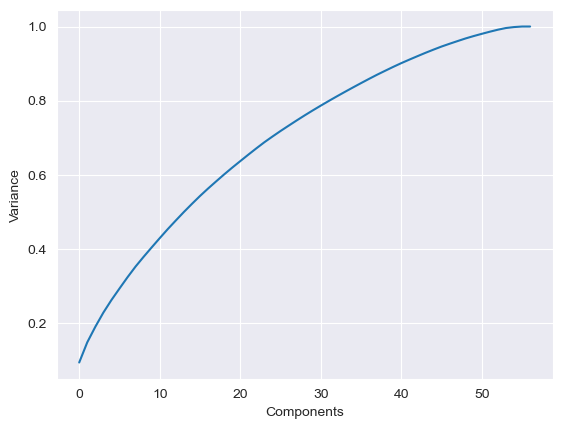

In [236]:

import matplotlib.pyplot as plot
plot.plot(num.cumsum(PCA.explained_variance_ratio_))
plot.xlabel("Components")
plot.ylabel("Variance")

In [237]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
X_PCA = PCA.fit(scaled_datas)
X_tests_PCA = PCA.fit(x_tests_scaled)

In [238]:
X_PCA =PCA.transform(scaled_datas)
x_tests_PCA = PCA.transform(x_tests_scaled)

print(scaled_datas.shape)
print(X_PCA.shape)

(1263, 57)
(1263, 2)


In [239]:
X_PCA

array([[-0.53262606, -0.99108125],
       [-0.62750788, -0.89872544],
       [-0.7712583 ,  0.07398843],
       ...,
       [ 3.48262737, -0.9178783 ],
       [-1.46021127,  2.87399575],
       [-0.43499416, -0.78284506]])

In [240]:
X_tests_PCA

PCA(n_components=2)

Text(0, 0.5, '6th PCA')

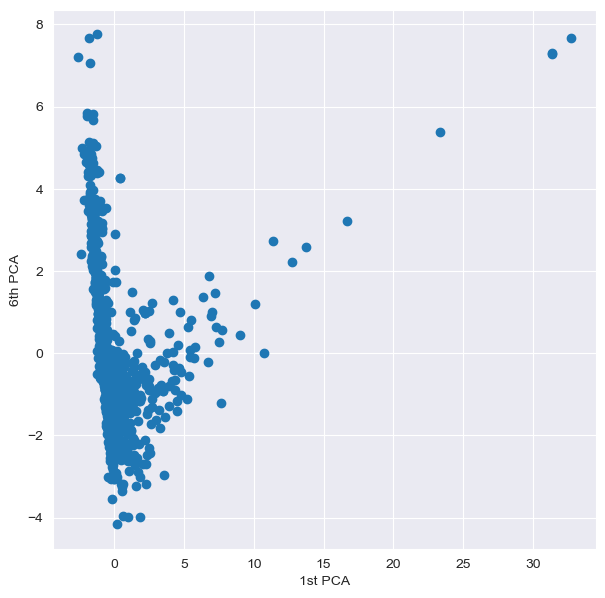

In [241]:
plot.figure(figsize=(7,7))
plot.scatter(X_PCA[:,0],X_PCA[:,1], )
plot.xlabel("1st PCA")
plot.ylabel("6th PCA")

In [242]:
x_stand =StandardScaler()
x_trains =x_stand.fit_transform(x_trains)
x_tests = x_stand.transform(x_tests)
len(y_tests)

2947

In [244]:
import math
print(math.sqrt(len(y_tests)))

54.286278192559855


In [245]:
classi = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [246]:
classi.fit(x_trains,y_trains)

ValueError: Unknown label type: 'continuous-multioutput'

In [209]:
classifier = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

knn = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [210]:
classifier.fit(x_trains,y_trains)

ValueError: Unknown label type: 'continuous-multioutput'

In [211]:
knn.fit(x_trains,y_trains)

ValueError: Unknown label type: 'continuous-multioutput'

In [189]:
Y_predict= classifier.predict(x_tests)
Y_predict

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'